In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Modeling pre-processing with scikit-learn functionality
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Modeling pre-processing with non-scikit-learn packages
from category_encoders.ordinal import OrdinalEncoder
from feature_engine.encoding import RareLabelEncoder

# Modeling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [49]:
housing = pd.read_csv("../data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Dummy Encoding

In [53]:
# dummy encode
encoder = OneHotEncoder(drop='first')

# apply to all categorical features
dummy_encoder = ColumnTransformer([("dummy", encoder, selector(dtype_include="object"))])

### Filter out zero or near-zero variance features.

In [30]:
housing.var()

/var/folders/1w/scrjk4ds4bsbfllhkql32nrw0000gn/T/ipykernel_13854/2527284353.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing.var()


longitude             4.014139e+00
latitude              4.562293e+00
housing_median_age    1.583963e+02
total_rooms           4.759445e+06
total_bedrooms        1.775654e+05
population            1.282470e+06
households            1.461760e+05
median_income         3.609323e+00
median_house_value    1.331615e+10
dtype: float64

In [38]:
nzv = VarianceThreshold(threshold=0.1)

### Imputation

In [39]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [54]:
knn_imp = KNNImputer(n_neighbors=6)

In [24]:
# bedrooms_mean = float(int(housing["total_bedrooms"].mean()))
# housing["total_bedrooms"].fillna(bedrooms_mean, inplace = True)

In [34]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
# create train/test split
train, test = train_test_split(housing, train_size=0.7, random_state=123)

In [12]:
# separate features from labels and only use numeric features
X_train = train.drop("median_house_value", axis=1)
y_train = train[["median_house_value"]]

In [14]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

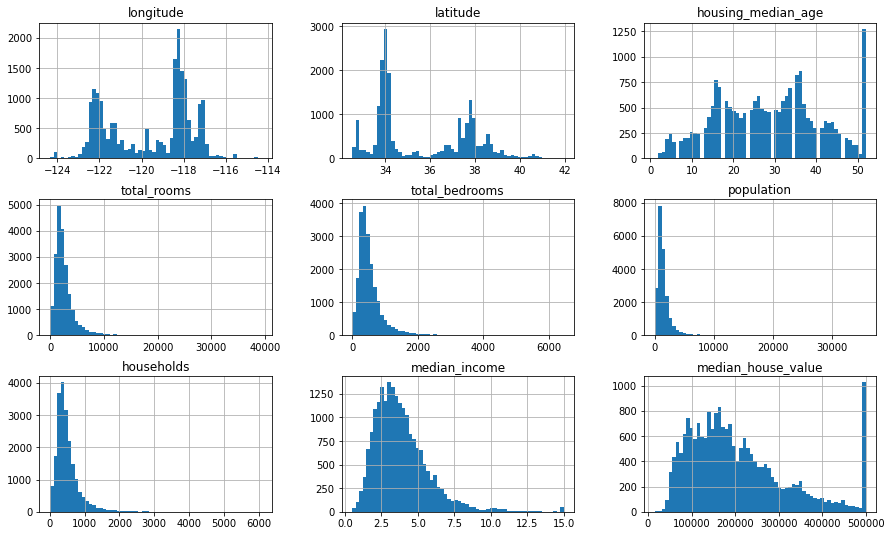

In [15]:
housing.hist(bins=60, figsize=(15,9));plt.show()

In [13]:
#Use a features selection technique to select those features in
#your data that contribute most to the prediction.
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

ValueError: could not convert string to float: 'INLAND'